**Общая информация** (Курбанов Ринат)

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [14]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
from scipy.spatial.distance import cdist
from sklearn import metrics
from mlxtend.data import loadlocal_mnist
#%load_ext pycodestyle_magic

In [54]:
#%%pycodestyle
class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin, ClassifierMixin):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors=n_neighbors;
        self.algorithm=algorithm;
    
    def fit(self, X, y):
        self.X_tr=np.array(X).astype(float);
        self.y_tr=np.array(y).astype(int)
        self.classes_number = len(np.unique(y))
        if self.algorithm == 'kd_tree':
            self.kd_tree = KDTree(self.X_tr)
    
    def predict(self, X):
        if self.algorithm == 'brute':
            dist = metrics.pairwise_distances(np.array(X).astype(float), self.X_tr)
            #dist = cdist(np.array(X).astype(float),self.X_tr, metric='minkowski') долго
            self.ind = dist.argpartition(self.n_neighbors)[:, :self.n_neighbors]
        elif self.algorithm == 'kd_tree':
            self.ind = self.kd_tree.query(np.array(X).astype(float), k = self.n_neighbors)[1]
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), 1, self.y_tr[self.ind])
    
    def predict_proba(self, X):
        if self.algorithm == 'brute':
            dist = metrics.pairwise_distances(np.array(X).astype(float), self.X_tr)
            #dist = cdist(np.array(X).astype(float),self.X_tr, metric='minkowski') долго
            self.ind = dist.argpartition(self.n_neighbors)[:, :self.n_neighbors]
        elif self.algorithm == 'kd_tree':
            self.ind = self.kd_tree.query(np.array(X).astype(float), k = self.n_neighbors)[1]
        return np.apply_along_axis(lambda k: np.bincount(k,
                                            minlength=self.classes_number) / self.n_neighbors,
                                   1, self.y_tr[self.ind])
            
    
    def score(self, X, y):
        return (self.predict(X.astype(float))==y.astype(int)).mean()

**IRIS**

In [16]:
iris = datasets.load_iris()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [18]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [19]:
%time clf.fit(X_train, y_train)

Wall time: 992 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [20]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [21]:
%time clf.predict(X_test)

Wall time: 0 ns


array([2, 0, 2, 1, 0, 1, 0, 2, 0, 2, 2, 0, 2, 1, 2])

In [22]:
%time my_clf.predict(X_test)

Wall time: 972 µs


array([2, 0, 2, 1, 0, 1, 0, 2, 0, 2, 2, 0, 2, 1, 2], dtype=int64)

In [23]:
%time clf.predict_proba(X_test)

Wall time: 997 µs


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [24]:
%time my_clf.predict_proba(X_test)

Wall time: 1 ms


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [25]:
clf.score(X_test, y_test)

0.8666666666666667

In [26]:
my_clf.score(X_test, y_test)

0.8666666666666667

Задание 3

Best is 19


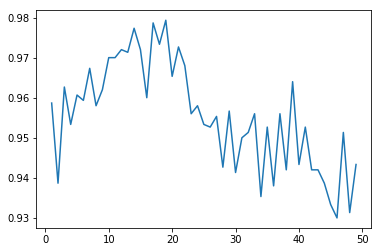

In [27]:
num_tests=100
max_n=50
res = []
for i in range(1, max_n):
    cur_res = []
    for j in range(num_tests):
        X_train, X_test, y_train, y_test = train_test_split(
            iris.data, iris.target, test_size = 0.1,
            stratify = iris.target)
        my_clf = MyKNeighborsClassifier(n_neighbors=i)
        my_clf.fit(X_train, y_train)
        cur_res.append(my_clf.score(X_test, y_test))
    res.append(np.mean(cur_res))
best = np.argmax(res)+1
print("Best is {}".format(best))
plt.plot(range(1, max_n), res)
plt.show()

**MNIST**

In [28]:
X, y = loadlocal_mnist(
        images_path='train-images.idx3-ubyte', 
        labels_path='train-labels.idx1-ubyte')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01)

In [29]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [30]:
%time clf.fit(X_train, y_train)

Wall time: 13.6 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [31]:
%time my_clf.fit(X_train, y_train)

Wall time: 179 ms


In [32]:
%time clf.predict(X_test)

Wall time: 37.3 s


array([6, 5, 9, 5, 5, 5, 5, 9, 6, 9, 4, 5, 3, 3, 6, 0, 8, 9, 8, 2, 3, 6,
       5, 4, 3, 5, 4, 9, 0, 6, 9, 4, 2, 3, 7, 8, 0, 5, 0, 8, 0, 0, 6, 3,
       2, 9, 1, 0, 4, 8, 0, 4, 0, 1, 6, 3, 5, 9, 7, 2, 2, 7, 2, 0, 9, 2,
       6, 4, 9, 2, 4, 0, 6, 1, 7, 8, 1, 4, 8, 5, 7, 6, 8, 6, 5, 2, 7, 6,
       3, 3, 9, 1, 2, 6, 0, 0, 3, 6, 3, 9, 7, 3, 7, 2, 3, 3, 4, 7, 2, 8,
       8, 1, 9, 3, 1, 4, 7, 1, 9, 9, 3, 2, 1, 4, 4, 0, 1, 9, 6, 7, 3, 0,
       9, 2, 3, 1, 3, 3, 8, 2, 0, 2, 7, 4, 6, 3, 4, 1, 1, 7, 5, 9, 4, 7,
       1, 7, 8, 2, 7, 2, 3, 9, 9, 0, 7, 6, 2, 3, 3, 6, 4, 0, 3, 7, 0, 1,
       7, 3, 6, 5, 6, 3, 4, 5, 7, 9, 0, 5, 5, 2, 2, 1, 1, 9, 6, 8, 8, 2,
       6, 3, 4, 2, 4, 4, 3, 5, 8, 3, 3, 3, 8, 2, 6, 5, 8, 1, 8, 9, 2, 2,
       1, 9, 8, 8, 0, 7, 6, 1, 0, 9, 6, 8, 0, 9, 3, 0, 0, 0, 9, 0, 0, 0,
       2, 7, 6, 5, 7, 2, 6, 6, 3, 0, 2, 9, 8, 8, 0, 2, 6, 0, 0, 8, 1, 0,
       0, 2, 2, 7, 3, 3, 2, 4, 3, 6, 0, 5, 9, 1, 2, 5, 0, 0, 7, 7, 2, 0,
       1, 0, 4, 5, 3, 8, 1, 8, 6, 0, 1, 7, 6, 6, 2,

In [33]:
%time my_clf.predict(X_test)

Wall time: 941 ms


array([6, 5, 9, 5, 5, 5, 5, 9, 6, 9, 4, 5, 3, 3, 6, 0, 8, 9, 8, 2, 3, 6,
       5, 4, 3, 5, 4, 9, 0, 6, 9, 4, 2, 3, 7, 8, 0, 5, 0, 8, 0, 0, 6, 3,
       2, 9, 1, 0, 4, 8, 0, 4, 0, 1, 6, 3, 5, 9, 7, 2, 2, 7, 2, 0, 9, 2,
       6, 4, 9, 2, 4, 0, 6, 1, 7, 8, 1, 4, 8, 5, 7, 6, 8, 6, 5, 2, 7, 6,
       3, 3, 9, 1, 2, 6, 0, 0, 3, 6, 3, 9, 7, 3, 7, 2, 3, 3, 4, 7, 2, 8,
       8, 1, 9, 3, 1, 4, 7, 1, 9, 9, 3, 2, 1, 4, 4, 0, 1, 9, 6, 7, 3, 0,
       9, 2, 3, 1, 3, 3, 8, 2, 0, 2, 7, 4, 6, 3, 4, 1, 1, 7, 5, 9, 4, 7,
       1, 7, 8, 2, 7, 2, 3, 9, 9, 0, 7, 6, 2, 3, 3, 6, 4, 0, 3, 7, 0, 1,
       7, 3, 6, 5, 6, 3, 4, 5, 7, 9, 0, 5, 5, 2, 2, 1, 1, 9, 6, 8, 8, 2,
       6, 3, 4, 2, 4, 4, 3, 5, 8, 3, 3, 3, 8, 2, 6, 5, 8, 1, 8, 9, 2, 2,
       1, 9, 8, 8, 0, 7, 6, 1, 0, 9, 6, 8, 0, 9, 3, 0, 0, 0, 9, 0, 0, 0,
       2, 7, 6, 5, 7, 2, 6, 6, 3, 0, 2, 9, 8, 8, 0, 2, 6, 0, 0, 8, 1, 0,
       0, 2, 2, 7, 3, 3, 2, 4, 3, 6, 0, 5, 9, 1, 2, 5, 0, 0, 7, 7, 2, 0,
       1, 0, 4, 5, 3, 8, 1, 8, 6, 0, 1, 7, 6, 6, 2,

In [34]:
%time clf.predict_proba(X_test)

Wall time: 37.7 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [35]:
%time my_clf.predict_proba(X_test)

Wall time: 929 ms


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [36]:
clf.score(X_test, y_test)

0.9633333333333334

In [37]:
my_clf.score(X_test, y_test)

0.9633333333333334

Задание 4

In [51]:
clf = KNeighborsClassifier(n_neighbors=19, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=19, algorithm='kd_tree')

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01)

In [40]:
%time clf.fit(X_train, y_train)

Wall time: 13.4 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=19, p=2,
           weights='uniform')

In [52]:
%time my_clf.fit(X_train, y_train)

Wall time: 13.8 s


In [42]:
%time clf.predict(X_test)

Wall time: 36.7 s


array([0, 8, 6, 0, 7, 1, 6, 7, 8, 2, 4, 3, 2, 6, 0, 1, 9, 2, 2, 5, 4, 8,
       4, 9, 9, 0, 6, 7, 2, 2, 7, 0, 3, 5, 6, 1, 8, 6, 2, 2, 3, 8, 4, 3,
       2, 1, 4, 2, 7, 1, 4, 5, 5, 2, 8, 0, 8, 7, 9, 2, 1, 3, 9, 1, 3, 8,
       6, 8, 0, 6, 7, 1, 2, 8, 7, 8, 3, 4, 2, 3, 1, 8, 8, 1, 4, 6, 3, 9,
       9, 9, 7, 1, 8, 4, 6, 8, 9, 0, 4, 1, 1, 7, 9, 2, 2, 7, 5, 1, 0, 9,
       5, 5, 6, 1, 4, 4, 6, 6, 8, 5, 1, 3, 4, 1, 4, 3, 3, 3, 5, 3, 0, 0,
       2, 8, 1, 8, 5, 8, 6, 1, 7, 1, 6, 8, 4, 6, 1, 5, 1, 7, 9, 7, 6, 2,
       6, 5, 8, 1, 3, 2, 5, 3, 4, 6, 8, 3, 2, 8, 1, 6, 9, 6, 6, 3, 6, 9,
       9, 2, 1, 0, 1, 0, 7, 1, 3, 6, 0, 2, 7, 2, 0, 9, 7, 5, 0, 6, 1, 6,
       7, 3, 4, 1, 9, 1, 6, 0, 6, 0, 0, 5, 9, 6, 1, 2, 9, 0, 4, 0, 1, 1,
       1, 6, 3, 5, 7, 4, 5, 9, 7, 9, 3, 1, 0, 1, 9, 2, 0, 0, 8, 1, 5, 8,
       9, 2, 5, 8, 0, 6, 6, 3, 7, 1, 7, 3, 9, 6, 2, 4, 4, 4, 3, 0, 0, 3,
       1, 1, 3, 3, 1, 7, 0, 7, 6, 2, 7, 8, 3, 9, 7, 8, 0, 5, 2, 0, 1, 6,
       9, 2, 7, 2, 8, 7, 2, 7, 6, 0, 3, 9, 6, 8, 7,

In [53]:
%time my_clf.predict(X_test)

Wall time: 37.9 s


array([0, 8, 6, 0, 7, 1, 6, 7, 8, 2, 4, 3, 2, 6, 0, 1, 9, 2, 2, 5, 4, 8,
       4, 9, 9, 0, 6, 7, 2, 2, 7, 0, 3, 5, 6, 1, 8, 6, 2, 2, 3, 8, 4, 3,
       2, 1, 4, 2, 7, 1, 4, 5, 5, 2, 8, 0, 8, 7, 9, 2, 1, 3, 9, 1, 3, 8,
       6, 8, 0, 6, 7, 1, 2, 8, 7, 8, 3, 4, 2, 3, 1, 8, 8, 1, 4, 6, 3, 9,
       9, 9, 7, 1, 8, 4, 6, 8, 9, 0, 4, 1, 1, 7, 9, 2, 2, 7, 5, 1, 0, 9,
       5, 5, 6, 1, 4, 4, 6, 6, 8, 5, 1, 3, 4, 1, 4, 3, 3, 3, 5, 3, 0, 0,
       2, 8, 1, 8, 5, 8, 6, 1, 7, 1, 6, 8, 4, 6, 1, 5, 1, 7, 9, 7, 6, 2,
       6, 5, 8, 1, 3, 2, 5, 3, 4, 6, 8, 3, 2, 8, 1, 6, 9, 6, 6, 3, 6, 9,
       9, 2, 1, 0, 1, 0, 7, 1, 3, 6, 0, 2, 7, 2, 0, 9, 7, 5, 0, 6, 1, 6,
       7, 3, 4, 1, 9, 1, 6, 0, 6, 0, 0, 5, 9, 6, 1, 2, 9, 0, 4, 0, 1, 1,
       1, 6, 3, 5, 7, 4, 5, 9, 7, 9, 3, 1, 0, 1, 9, 2, 0, 0, 8, 1, 5, 8,
       9, 2, 5, 8, 0, 6, 6, 3, 7, 1, 7, 3, 9, 6, 2, 4, 4, 4, 3, 0, 0, 3,
       1, 1, 3, 3, 1, 7, 0, 7, 6, 2, 7, 8, 3, 9, 7, 8, 0, 5, 2, 0, 1, 6,
       9, 2, 7, 2, 8, 7, 2, 7, 6, 0, 3, 9, 6, 8, 7,

In [44]:
%time clf.predict_proba(X_test)

Wall time: 37.2 s


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [55]:
%time my_clf.predict_proba(X_test)

Wall time: 37.7 s


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [46]:
clf.score(X_test, y_test)

0.9716666666666667

In [56]:
my_clf.score(X_test, y_test)

0.9716666666666667

Задание 5

In [ ]:
# seaborn - библиотека визуализации данных Python, основанная на matplotlib. Красивые графики и диаграммы.
# matplotlib - это бибилиотека двумерной графики для языка программирования python с 
#               помощью которой можно создавать высококачественные рисунки различных форматов
# train_test_split - разбивает на случайные трейновые и тестовые массивы. 
#            с помощью трейновых обучаем машину, а при помощи тестовых проверяем насколько хорошо она обучилась
# Pipeline%load_ext e (from sklearn.pipeline import Pipeline) -цепочка
#                         преобразований с окончательной оценкой,
#                         на вход одной функции подаётся
#                         выход другой функции.
# StandardScaler (from sklearn.preprocessing import StandardScaler) - Нормализация на стандартное отклонение. После него
#                                                                     среднее значение 0, стандартное отклонеие <=1.
# ClassifierMixin - базовый класс для всех классификаторов в sklearn
# NeighborsBase - Базовый класс для оценок ближайших соседей.
# KNeighborsMixin -базовый класс, для всех классов KNN, содержащих методы
#                   поиска ближайших соседей.
# SupervisedIntegerMixin- базовый класс с методом fit